# Making Business Decisions Based on Data


# Project description





<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>According to the terms of the task, I am a data analyst in a large online store.  Together with the marketing department, we have compiled a list of selling hypotheses that will help us increase the company's revenue.  The  general purpose of our project will be to identify priority hypotheses, conduct A / B testing of hypotheses, and then analyze the results.</b>

In [1]:
#loading the libraries
import pandas as pd
pd.set_option('display.max_colwidth', 150)
import scipy.stats as stats

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
#Let's load our dataset
hypotheses=pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.head(9)


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


We have the following data for the first part of the project in the dataset:

Hypotheses — brief descriptions of the hypotheses

Reach — user reach, on a scale of one to ten

Impact — impact on users, on a scale of one to ten

Confidence — confidence in the hypothesis, on a scale of one to ten

Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

In [3]:
orders=pd.read_csv('/datasets/orders_us.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


transactionId — order identifier

visitorId — identifier of the user who placed the order

date — of the order

revenue — from the order

group — the A/B test group that the user belongs to

In [4]:
visits=pd.read_csv('/datasets/visits_us.csv')
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


date — date

group — A/B test group

visits — the number of visits on the date specified in the A/B test group specified



In [5]:
visits['date']=pd.to_datetime(visits['date'],dayfirst=True)

In [6]:
orders['date']=pd.to_datetime(orders['date'],dayfirst=True)
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


# Part 1. Prioritizing Hypotheses
Product managers have a lots of ideas to improve the product. Choosing what to work on first is difficult, but necessary. To facilitate the prioritization of tasks, various evaluation systems have been devised. Our dataset contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. Let's try to prioritize them.


In [7]:
#Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
hypotheses['ICE']=(hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Effort']).round(1)

ICE=(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))
ICE.head(10)



,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.0
1,Launch your own delivery service. This will shorten delivery time,2.0
5,Add a customer review page. This will increase the number of orders,1.3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.1
4,Change the background color on the main page. This will increase user engagement,1.0


The ICE prioritization method was invented by Sean Ellis. ICE was originally intended to prioritize growth experiments. Later, ICE was also used to prioritize hypotheses. In ICE, we use a scale so that all factors have a balanced effect on the final score. As we see, in our case the best score has the 8th Hypothesis "Launch a promotion that gives users discounts on their birthdays".

In [8]:
#Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
hypotheses['RICE']=hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Effort']
RICE=(hypotheses[['Hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending=False))
RICE.head(10)



,Hypothesis,RICE,ICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0,11.2
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0,7.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0,13.3
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0,8.0
8,Launch a promotion that gives users discounts on their birthdays,16.2,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0,1.1
1,Launch your own delivery service. This will shorten delivery time,4.0,2.0
5,Add a customer review page. This will increase the number of orders,4.0,1.3
4,Change the background color on the main page. This will increase user engagement,3.0,1.0


We need to simply and quickly decide what to work on first. RICE is an other method for prioritizing product ideas. The abbreviation includes 4 factors that can be safely used to evaluate and prioritize product features. To get a RICE score, we need to combine these factors. As we see, the best score has the 7th Hypothesis "Add a subscription form to all the main pages. This will help you compile a mailing list".

_______________________________________________________________________________________________________________________

How to do what will bring more benefit to the business and not mess with the deadlines is a difficult question. When we use RICE instead of ICE the prioritization of hypotheses changes. The explanation for this changes may consist in the fact of taking into account the reach of the audience of the product from all the main pages of the store. On the other hand the offer of discounts on birthdays obviously has a smaller effect (once a year for an each custumer). 




# Part 2. A/B Test Analysis


We carried out an A/B test and got the results in the orders_us.csv and visits_us.csv. Now let's analyze the A/B test.


Graph cumulative revenue by group.



<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Let's make sure to preprocess the data. There might be mistakes in the original datasets, some of the visitors have gotten into both group A and group B.
</b>

In [48]:
Both_Groups=orders.groupby('visitorId').agg({'group':'nunique'}).query('group!=1').reset_index()
Both_Groups.count()

visitorId    58
group        58
dtype: int64

On the slice, we see 58 rows of users who fell into both groups. They need to be removed

In [49]:
#Let's drop the rows, that have gotten both in groups
Unique_Groups = orders.query('visitorId not in @Both_Groups.visitorId')
Unique_Groups

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [50]:
# counting clear duplicates
datesGroups = Unique_Groups[['date','group']]
print (Unique_Groups.duplicated().sum())


0


In [51]:
#print an array with unique paired date-group values
datesGroups = Unique_Groups[['date','group']]
datesGroups

,date,group
0,2019-08-15,B
1,2019-08-15,B
3,2019-08-15,B
4,2019-08-15,B
5,2019-08-15,B
...,...,...
1191,2019-08-14,B
1192,2019-08-14,B
1193,2019-08-14,A
1194,2019-08-14,A


In [52]:
#Let's collect the aggregated cumulative daily data on orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [53]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [54]:
#We merge the two tables into one
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visits
0 2019-08-01     A      24      20   2356.8     719
1 2019-08-01     A      24      20   2356.8     719
2 2019-08-01     A      24      20   2356.8     719
3 2019-08-01     A      24      20   2356.8     719
4 2019-08-01     A      24      20   2356.8     719


In [55]:
control=cumulativeData[cumulativeData['group']=='A']

control

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,A,24,20,2356.8,719
2,2019-08-01,A,24,20,2356.8,719
3,2019-08-01,A,24,20,2356.8,719
4,2019-08-01,A,24,20,2356.8,719
...,...,...,...,...,...,...
17850,2019-08-31,A,557,503,64554.9,18736
17851,2019-08-31,A,557,503,64554.9,18736
17852,2019-08-31,A,557,503,64554.9,18736
17853,2019-08-31,A,557,503,64554.9,18736


In [56]:
test=cumulativeData[cumulativeData['group']=='B']

test.head()


,date,group,orders,buyers,revenue,visits
529,2019-08-01,B,21,20,1620.0,713
530,2019-08-01,B,21,20,1620.0,713
531,2019-08-01,B,21,20,1620.0,713
532,2019-08-01,B,21,20,1620.0,713
533,2019-08-01,B,21,20,1620.0,713


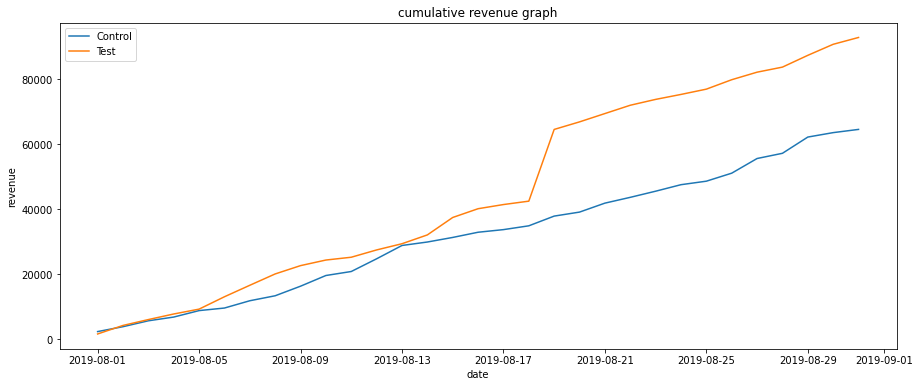

In [57]:
#Let's plot cumulative revenue graphs by day and A/B test group:
plt.title('cumulative revenue graph')
plt.xlabel('date')
plt.ylabel('revenue', rotation=90)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(control['date'], control['revenue'], label='Control')
plt.plot(test['date'], test['revenue'], label='Test')
plt.legend()

Revenue is rising steadily throughout the whole test. That's a good sign. However, we can see that both groups see spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.

Graph cumulative average order size by group. We'll divide cumulative revenue by the cumulative number of orders:


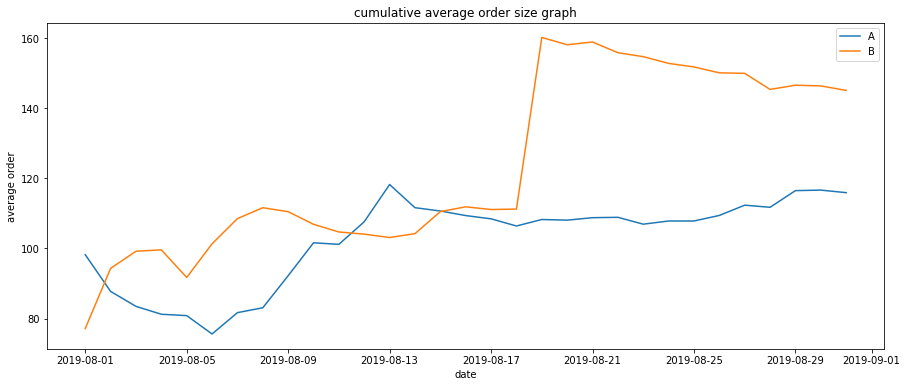

In [58]:
plt.title('cumulative average order size graph')
plt.xlabel('date')
plt.ylabel('average order', rotation=90)

plt.plot(control['date'], control['revenue']/control['orders'], label='A')
plt.plot(test['date'], test['revenue']/test['orders'], label='B')
plt.legend()

Average purchase size becomes steady by the end of the test, too: it stabilizes for group A and keeps on falling for group B. The surge in group B in the first half of the test may have been due to the presence of large, expensive orders. We need more data on this group to find the true average purchase size and establish its level.

Let's graph the relative difference in cumulative average order size for group B compared with group A and add a horizontal axis with the axhline() method:


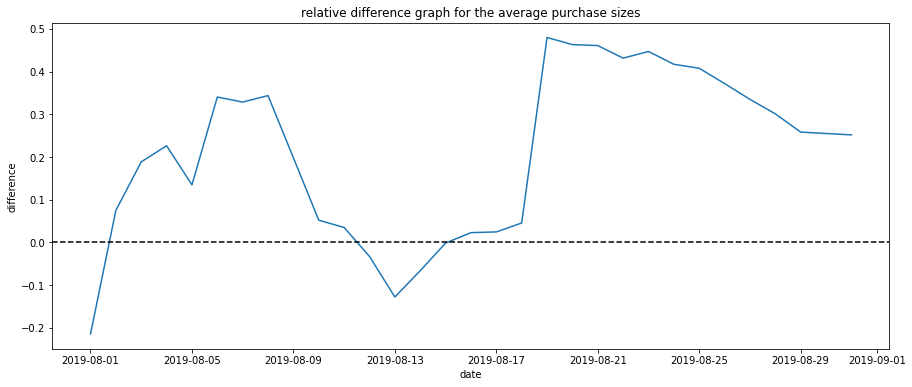

In [59]:
mergedCumulativeRevenue = control.merge(test, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.title('relative difference graph for the average purchase sizes')
plt.xlabel('date')
plt.ylabel('difference', rotation=90)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 

At several points the difference between the segments spikes. This means there must be some big orders and outliers

Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. We will plot the daily conversion rates of the two groups and see
the difference.


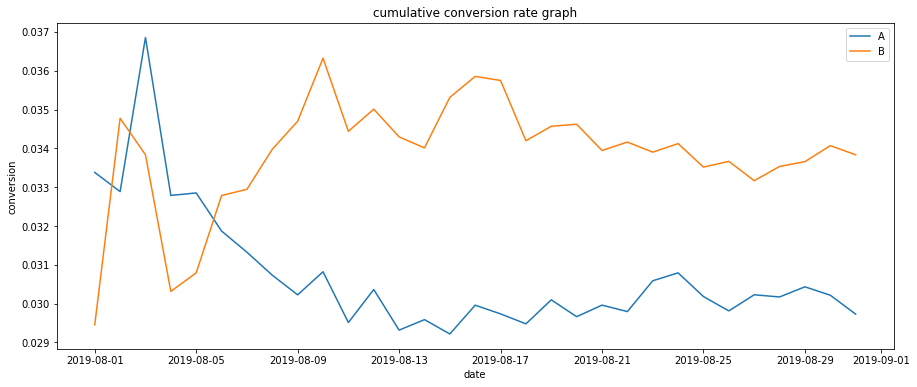

In [60]:
# calculating cumulative conversion rate
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.title('cumulative conversion rate graph')
plt.xlabel('date')
plt.ylabel('conversion', rotation=90)

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


From the biginning two groups were fluctuating simultaniously, but then the conversion rate of group B rose before stabilizing, while the conversion rate of group A dropped and stabilized too.

Let's plot a relative difference graph for the cumulative conversion rates:

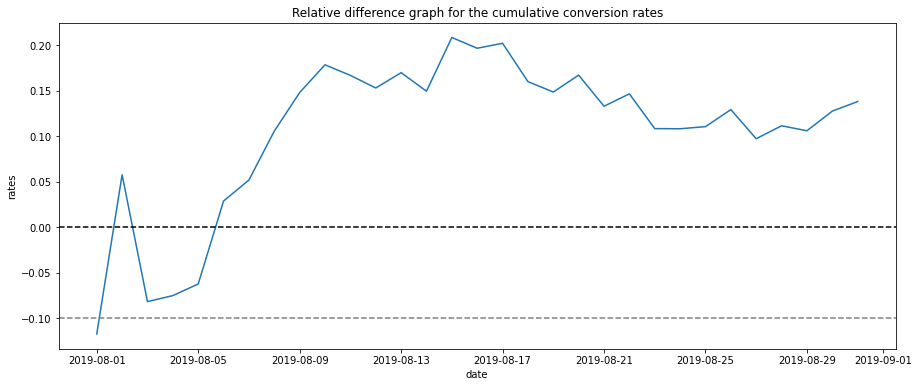

In [61]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# plotting the graphs
plt.title('Relative difference graph for the cumulative conversion rates')
plt.xlabel('date')
plt.ylabel('rates', rotation=90)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


At the beginning of the test, group B was lagging behind, but then it suddenly took the lead. In general, the conversion ratio is not yet stable, so it's too early to draw conclusions about the test. In any case, first we should have a look at the anomalies, which can distort the results of an A/B test. An anomaly is a value that appears rarely in a statistical population but can introduce error when it does.

In [62]:
# Let's find number of orders by user
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(15))
 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
393   1614305549       4
114    457167155       4
619   2587333274       4
340   1404934699       3
937   3908431265       3


There are users with 5, 8,9, 11 orders. That's a lot more than a regular user would place.

Let's plot a distribution histogram with the number of orders per user.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

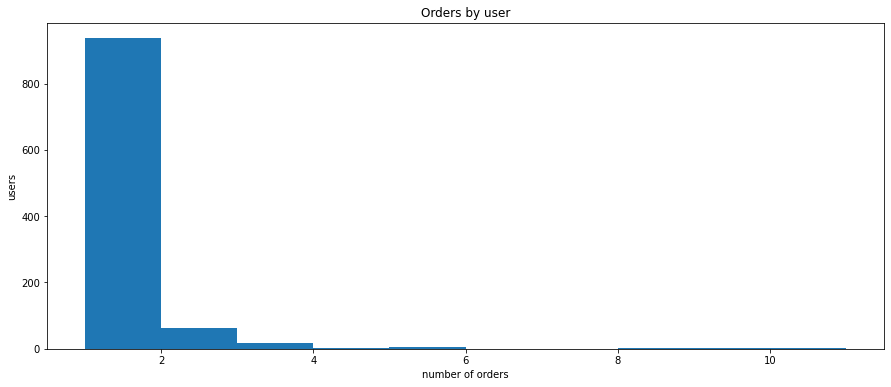

In [63]:
# plotting the hist
plt.title('Orders by user')
plt.xlabel('number of orders')
plt.ylabel('users', rotation=90)
plt.hist(ordersByUsers['orders']) 


The majority of customers placed only one order. However, some of them place two.
Let's plot a scatter chart with the number of orders per user:

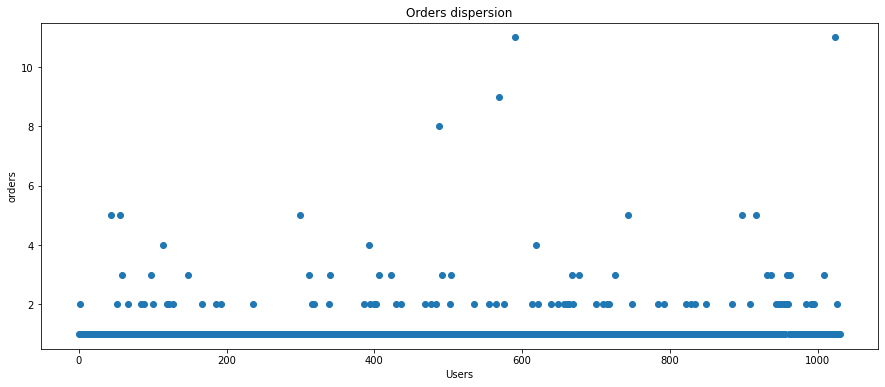

In [64]:
x_values = pd.Series(range(0,len(ordersByUsers)))
# plotting the scatter chart
plt.title('Orders dispersion')
plt.xlabel('Users')
plt.ylabel('orders', rotation=90)
plt.scatter(x_values, ordersByUsers['orders'])

Conclusion is confirmed by graph. There are a lots of users with two to four orders. Let's calculate percentiles for the number of orders per user:

In [65]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 


[1. 2. 4.]


No more than 5% of users placed more than 2 orders, and 10% of users made more than one.
Thus, it would be reasonable to set two orders per user as the lower limit for the number of orders and to filter anomalies. 

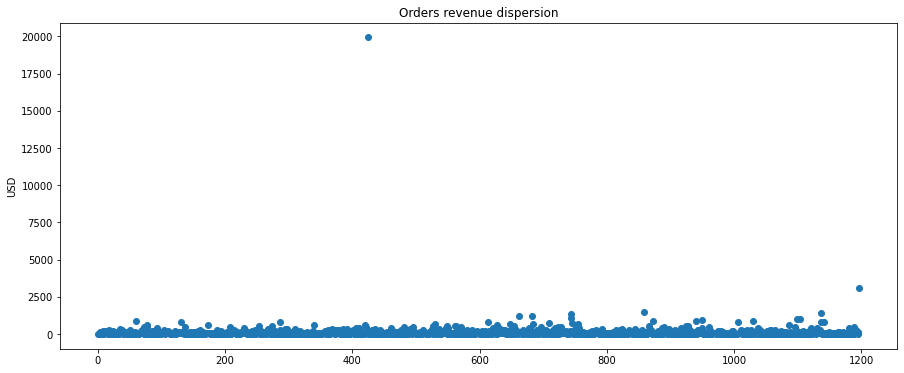

In [66]:
x_values = pd.Series(range(0, len(orders['revenue'])))

# plotting the scatter chart
plt.title('Orders revenue dispersion')
plt.ylabel('USD', rotation=90)
plt.scatter(x_values, orders['revenue'])

Based on the graph, there are a few abnormaly big orders. 

The chance that a random value is smaller than the n-th percentile is n percent(%). In a standard normal distribution where the mean is 0 and the standard deviation is 1, the 95th percentile will be 1.645. We will calculate the 95th and 99th percentiles of order revenue.




In [67]:
print(np.percentile(range(1,1001), [95, 99]))

[950.05 990.01]


In [68]:
#To calculate percentiles, we need the percentile() method:
print(np.percentile(orders['revenue'], [95, 99, 99.999])) 


[  435.54       900.904    19719.468412]


So, no more than 5% of orders are more than 435, and no more than 1 percent are bigger 900 USD.

Let's find the statistical significance of differences in conversion rate and order size between the groups, using the "raw" data (that is, the data before the removal of anomalies).


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>We declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. Those who didn't order anything will have 0. For the Mann-Whitney test we should formulate the null and alternative hypothesises:
1. Null hypothesis - there's not a statistically significant difference in conversion between the groups
2. Alternative hypothesis - the difference in conversion between the groups is statistically significant  
</b>


In [70]:
#We'll create the variables ordersByUsersA and ordersByUsersB to store the columns ['visitorId', 'orders']. 
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

#Now we declare the variables sampleA and sampleB.
#np.arange() function creates an array of indices in the np.array format required by pd.Series.
#the list needs to be concatenated  with pd.concat(). 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#We apply the criterion and format the p-value by rounding it to three decimal places

print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#Print the relative conversion gain for group B: group B conversion / group A conversion - 1. 
#we'll round the value to three decimal places.
print('relative conversion gain for group B:',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.017
relative conversion gain for group B: 0.138


Conclusion based on the raw data, there is a difference between groups A and B.
The first row of the output gives us the p-value, 0.017, which is lower than alfha significance level 0.05. So we reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative conversion gain for group B is 13.8% (the second row of the output).

Let's find the statistical significance of the difference in average order size between the groups using the raw data.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>To calculate the statistical significance of the difference in the segments average order size, we'll pass the data on revenue to the mannwhitneyu() criterion. We also find the relative difference in average order size between the groups. For the Mann-Whitney test we should formulate the null and alternative hypothesises:
1. Null hypothesis - there's not a statistically significant difference in the average order size between the groups
2. Alternative hypothesis - the difference in the average order size between the groups is statistically significant  
</b>


In [80]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('The difference of average order size for group B:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.692
The difference of average order size for group B: 0.252


The p-value is higher than alpha 0.05, so can't reject the null hypothesis and conclude that average order size differs between the groups. The size for group B is 25.2% better. 

Find the statistical significance of the difference in conversion between the groups using the filtered data. 

In [81]:
# Let's make data slices with the users who placed more than four orders (usersWithManyOrders) 
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
#Let's define anomalous  orders bigger than 435.54. Thus we'll remove the 5% of the most expensive orders.
usersWithExpensiveOrders = orders[orders['revenue'] > 435.54]['visitorId']
#Let's find the total number of anomalous users using the shape() method
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


We have 74 anomalous users in total. Let's try to find out how their actions affected the test results. We'll calculate the statistical significance of the differences in conversion between the groups.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>For the Mann-Whitney test we should formulate the null and alternative hypothesises:
1. Null hypothesis - there's not a statistically significant difference in conversion between the groups
2. Alternative hypothesis - the difference in conversion between the groups is statistically significant  
</b>


In [82]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
#Let's apply the statistical Mann-Whitney criterion:
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('relative conversion gain for group B:',"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.013
relative conversion gain for group B: 0.173


The results for conversion almost the same. Conclusion based on the filtered data, there is a difference between groups A and B. The first row of the output gives us the p-value, 0.013, which is lower than alfha significance level 0.05. So we reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative conversion gain for group B is 17.3% (the second row of the output).

Find the statistical significance of the difference in average order size between the groups using the filtered data. 

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>To calculate the statistical significance of the difference in the segments average order size, we pass the filtered data on revenue to the mannwhitneyu() criterion. We also find the relative difference in average order size between the groups. For the Mann-Whitney test we should formulate the null and alternative hypothesises:
1. Null hypothesis - there's not a statistically significant difference in the average order size between the groups
2. Alternative hypothesis - the difference in the average order size between the groups is statistically significant  
</b>


In [83]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('The relative difference in average order size:','{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.788
The relative difference in average order size: -0.019


The p-value increased up to 0.78. The p-value is higher than alpha 0.05, so we cannot say that there is any difference between the segments and conclude that the difference in the average order size between the groups is statistically significant. The average order size for group B is a little bit lower.

# Making a decision based on the test results. 


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>As we see the graph showing the difference in conversion between the groups tells us that group B's results are better. 
    
The graph showing the difference in average order size between the groups tells us that group B's results are getting better and are currently 30% higher than group A.
    
According to the tested statistical hypotheses we have the following results:
    
    1. For the Mann-Whitney test we should formulate the null and alternative hypothesises:
Null hypothesis - there's not a statistically significant difference in conversion between the groups/
    
Alternative hypothesis - the difference in conversion between the groups is statistically significant
    
    Conclusion based on the raw data, there is a difference between groups A and B. 
    The p-value, 0.017, which is lower than alfha significance level 0.05. So we reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative conversion gain for group B is 13.8% 
    
    2. To calculate the statistical significance of the difference in the segments average order size, we'll pass the data on revenue to the mannwhitneyu() criterion. We also find the relative difference in average order size between the groups. For the Mann-Whitney test we should formulate the null and alternative hypothesises: 1. Null hypothesis - there's not a statistically significant difference in the average order size between the groups 2. Alternative hypothesis - the difference in the average order size between the groups is statistically significant.
    The p-value is higher than alpha 0.05, so can't reject the null hypothesis and conclude that average order size differs between the groups. The size for group B is 25.2% better. 
    
 We have 74 anomalous users in total. We found out how their actions affected the test results. We'll calculate the statistical significance of the differences in conversion between the groups on filtered data.
    
    
   1. For the Mann-Whitney test we should formulate the null and alternative hypotheses: 
    
    Null hypothesis - there's not a statistically significant difference in conversion between the groups/
    
    Alternative hypothesis - the difference in conversion between the groups is statistically significant.
   The p-value is 0.013 and the relative conversion gain for group B: 0.173. So, the results for conversion almost the same. Conclusion based on the filtered data, there is a difference between groups A and B. The first row of the output gives us the p-value, 0.013, which is lower than alfha significance level 0.05. So we reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative conversion gain for group B is 17.3%
    
    
   2. To calculate the statistical significance of the difference in the segments average order size, we pass the filtered data on revenue to the mannwhitneyu() criterion. We also find the relative difference in average order size between the groups. For the Mann-Whitney test we should formulate the null and alternative hypothesises:
    
    Null hypothesis - there's not a statistically significant difference in the average order size between the groups/  Alternative hypothesis - the difference in the average order size between the groups is statistically significant.
    
    The p-value is 0.788, the relative difference in average order size: -0.019. So, the p-value is higher than alpha 0.05, and we can't say that there is any difference between the segments and conclude that the difference in the average order size between the groups is statistically significant. The average order size for group B is a little bit lower.
    
    
The possible decisions are: 
    
A. Stop the test, consider one of the groups the leader.
    
B. Stop the test, conclude that there is no difference between the groups.
    
C. Continue the test.  
</b>


We can conclude that the test is successful and should be continued. There's a probability that segment B will be better than segment A.

